## Digital Transaction Breakdown by Store
+ Source: Easy Star Records
+ Our dataset: Recent 3 years' Music albums' digital transaction by store (from 2018-01 to 2021-08)
+ 4.7 million rows, each row is a music album's digital transaction data in a music streaming store
+ Goal: Analyze past three years' albums revenue data for the Easy Star Records company and model the revenue given the release of albums over time
+ Motivation: Help Easy Star Records generate more money from a data scientist perspective

### Our data analysis toolbox

In [1]:
# Numpy and Pandas,
# canonical Python Libraries for numerical computing and data manipulation
import numpy as np
import pandas as pd 

# MatPlotLib, a canonical Python plotting Library
import matplotlib.pyplot as plt

# Seaborn, a library in Python predominantly used for making statistical graphics
import seaborn as sns

# sklearn is a Python module for machine learning 
import sklearn

import statsmodels.api as sm

### Data

In [2]:
# read data
df=pd.read_csv("https://www.dropbox.com/s/d4x3a92runccsvq/MRI%20-%20Digital%20Transaction%20Breakdown%20by%20Store%20%20Territory%20updated%202021-10-27T1610easystar010118to093021.csv?dl=1")

/Users/chenzhiqi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Data onboarding and cleaning

In [3]:
# column names
list(df.columns.values)

['Unnamed: 0',
 'Statement Month',
 'Store Name',
 'Label Name',
 'Artist Name',
 'Release Name',
 'Track Artist (Performer)',
 'Track Name',
 'ISRC',
 'Display Upc',
 'Country Code',
 'Continent',
 'Stream Ad-Supp, Stream Prem, Download, Physical, Locker, Other',
 'Units',
 'Gross Revenue USD',
 'Net Revenue USD']

In [4]:
df.shape

(4757930, 16)

In [5]:
df.head()

,Unnamed: 0,Statement Month,Store Name,Label Name,Artist Name,Release Name,Track Artist (Performer),Track Name,ISRC,Display Upc,Country Code,Continent,"Stream Ad-Supp, Stream Prem, Download, Physical, Locker, Other",Units,Gross Revenue USD,Net Revenue USD
0,1,2018-07,iTunes/Apple,MRI Entertainment,Rebelution,Free Rein,NaN,NaN,NaN,657481106983,US,North America,Download,"6,650","$46,550.00","$41,895.00"
1,2,2021-07,iTunes/Apple,MRI Entertainment,Rebelution,In the Moment,NaN,NaN,NaN,657481109182,US,North America,Download,"1,723","$12,061.00","$10,854.90"
2,3,2018-08,iTunes/Apple,MRI Entertainment,Rebelution,Free Rein,NaN,NaN,NaN,657481106983,US,North America,Download,"1,337","$9,359.00","$8,423.10"
3,4,2021-08,iTunes/Apple,MRI Entertainment,Rebelution,In the Moment,NaN,NaN,NaN,657481109182,US,North America,Download,734,"$5,138.00","$4,624.20"
4,5,2018-08,iTunes/Apple,MRI Entertainment,Protoje,A Matter of Time,NaN,NaN,NaN,657481106884,US,North America,Download,685,"$4,795.00","$4,315.50"


In [6]:
df.isnull().sum()

Unnamed: 0                                                            0
Statement Month                                                       0
Store Name                                                            0
Label Name                                                            0
Artist Name                                                           0
Release Name                                                          0
Track Artist (Performer)                                          47077
Track Name                                                         6521
ISRC                                                               6521
Display Upc                                                           0
Country Code                                                       1689
Continent                                                             0
Stream Ad-Supp, Stream Prem, Download, Physical, Locker, Other        0
Units                                                           

In [7]:
df.nunique()

Unnamed: 0                                                        4757930
Statement Month                                                        44
Store Name                                                             85
Label Name                                                              1
Artist Name                                                            36
Release Name                                                          254
Track Artist (Performer)                                              143
Track Name                                                           1119
ISRC                                                                 1181
Display Upc                                                           287
Country Code                                                          229
Continent                                                               6
Stream Ad-Supp, Stream Prem, Download, Physical, Locker, Other          5
Units                                 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757930 entries, 0 to 4757929
Data columns (total 16 columns):
 #   Column                                                          Dtype         
---  ------                                                          -----         
 0   Unnamed: 0                                                      int64         
 1   Statement Month                                                 datetime64[ns]
 2   Store Name                                                      object        
 3   Label Name                                                      object        
 4   Artist Name                                                     object        
 5   Release Name                                                    object        
 6   Track Artist (Performer)                                        object        
 7   Track Name                                                      object        
 8   ISRC                                      

In [194]:
from datetime import datetime
# Statement Month to datetime
df['Statement Month'] = pd.to_datetime(df['Statement Month'])
#Adjust column type
## Gross Revenue to float
df['Gross Revenue USD'] = df['Gross Revenue USD'].str.replace('$','').str.replace(',','').astype('float')
## Net Revenue to float
df['Net Revenue USD'] = df['Net Revenue USD'].str.replace('$','').str.replace(',','').astype('float')
## Units to int
df['Units'] = df['Units'].str.replace(',','').astype('int')
# Unite single band called by two different names
df['Artist Name'] = np.where(df['Artist Name'] == 'Easy Star All Stars', 'Easy Star All-Stars', df['Artist Name'])

AttributeError: Can only use .str accessor with string values!

In [12]:
# Check 
df.head()

,Unnamed: 0,Statement Month,Store Name,Label Name,Artist Name,Release Name,Track Artist (Performer),Track Name,ISRC,Display Upc,Country Code,Continent,"Stream Ad-Supp, Stream Prem, Download, Physical, Locker, Other",Units,Gross Revenue USD,Net Revenue USD
0,1,2018-07-01,iTunes/Apple,MRI Entertainment,Rebelution,Free Rein,NaN,NaN,NaN,657481106983,US,North America,Download,"6,650",46550.0,41895.0
1,2,2021-07-01,iTunes/Apple,MRI Entertainment,Rebelution,In the Moment,NaN,NaN,NaN,657481109182,US,North America,Download,"1,723",12061.0,10854.9
2,3,2018-08-01,iTunes/Apple,MRI Entertainment,Rebelution,Free Rein,NaN,NaN,NaN,657481106983,US,North America,Download,"1,337",9359.0,8423.1
3,4,2021-08-01,iTunes/Apple,MRI Entertainment,Rebelution,In the Moment,NaN,NaN,NaN,657481109182,US,North America,Download,734,5138.0,4624.2
4,5,2018-08-01,iTunes/Apple,MRI Entertainment,Protoje,A Matter of Time,NaN,NaN,NaN,657481106884,US,North America,Download,685,4795.0,4315.5


### Data Cleaning

In [13]:
# Unite single band called by two different names
df['Artist Name'] = np.where(df['Artist Name'] == 'Easy Star All Stars', 'Easy Star All-Stars', df['Artist Name'])

## Exploratory Data Analysis
### Data Profile - Store & Streaming Levels

### Total Net Revenue by Country

In [15]:
# Pivot Table
Country = df.pivot_table(index = ['Country Code'], values = ['Gross Revenue USD','Net Revenue USD'], aggfunc = 'sum')
Country.sort_values(by='Net Revenue USD', ascending=False).head()

,Gross Revenue USD,Net Revenue USD
Country Code,,
US,4.791706e+06,4.312545e+06
GB,1.527124e+05,1.374424e+05
CA,8.690134e+04,7.820079e+04
DE,4.379976e+04,3.941159e+04
BR,3.829593e+04,3.446375e+04


In [151]:
# US is the largest market (given market share)
Country_df = Country.reset_index()
Country_US = Country_df.loc[Country_df['Country Code'] == 'US', ['Gross Revenue USD']].sum(axis=0)
Country_US
#plt.pie(Country)

Gross Revenue USD    4.791706e+06
dtype: float64

In [152]:
Country_Others = Country_df.loc[Country_df['Country Code'] != 'US', ['Gross Revenue USD']].sum(axis=0)
Country_Others

Gross Revenue USD    642366.83
dtype: float64

<ipython-input-153-a83826ef90c2>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(df_pie, labels = mylabels, explode = myexplode, autopct='%1.1f%%')


Text(0.5, 1.0, 'Market Share - Total Gross Revenue by Country')

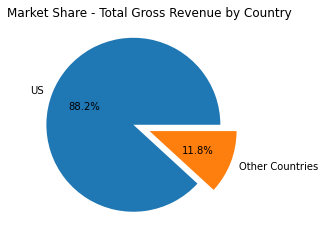

In [153]:
data_pie = [['US', 4.791706e+06], ['Other', 642366.83]]
df_pie = pd.DataFrame(data_pie, columns = ['Country', 'Gross Revenue USD'])
df_pie = df_pie.set_index('Country')
mylabels = ['US', 'Other Countries']
myexplode = [0.2, 0]
plt.pie(df_pie, labels = mylabels, explode = myexplode, autopct='%1.1f%%')
plt.title("Market Share - Total Gross Revenue by Country")

### Total Net Revenue by Store

In [154]:
# Pivot Table
Store = df.pivot_table(index = ['Store Name'], values = ['Gross Revenue USD'], aggfunc = 'sum')
Store.sort_values(by='Gross Revenue USD', ascending=False).head()

,Gross Revenue USD
Store Name,
Spotify,1.929694e+06
iTunes/Apple,1.492912e+06
Pandora,6.458172e+05
Amazon Unlimited,3.855544e+05
YouTube,2.647820e+05


In [159]:
Store.to_csv('store.csv')

Text(0.5, 1.0, 'Top 5 Stores  Most Gross Revenue')

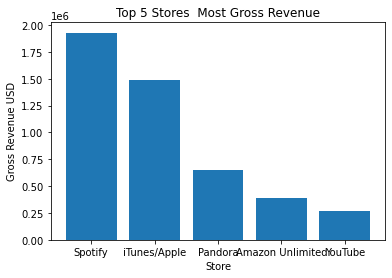

In [158]:
Store_5 = Store.sort_values(by='Gross Revenue USD', ascending=False).head(5)
Store_5 = Store_5.reset_index()
plt.bar(Store_5['Store Name'], Store_5['Gross Revenue USD'])
plt.xlabel("Store")
plt.ylabel("Gross Revenue USD")
plt.title("Top 5 Stores  Most Gross Revenue")

### Total Net Revenue by Store by Streaming type

In [53]:
# Pivot Table
Store_Stream = df.pivot_table(index = ['Store Name', 'Stream Ad-Supp, Stream Prem, Download, Physical, Locker, Other'], values = ['Net Revenue USD'], aggfunc = 'sum')
#Store.sort_values(by='Net Revenue USD', ascending=False).head()
Store_Stream = Store_Stream.reset_index()
Store.to_csv('store.csv')

,Store Name,"Stream Ad-Supp, Stream Prem, Download, Physical, Locker, Other",Net Revenue USD
0,7 Digital,Download,220.680000
1,AMI Entertainment,Stream Premium,4578.360000
2,AWA,Stream Ad-Supported,6.340000
3,AWA,Stream Premium,334.630000
4,AllSaints Music Group,Stream Ad-Supported,5.990000
...,...,...,...
129,iTunes/Apple,Locker,9709.640000
130,iTunes/Apple,Other,0.010000
131,iTunes/Apple,Stream Ad-Supported,150.660000
132,iTunes/Apple,Stream Premium,964528.320005


In [58]:
top_5_store = ['Spotify', 'iTunes/Apple', 'Pandora', 'Amazon Unlimited', 'YouTube']
Store_Stream = Store_Stream.pivot(index = 'Stream Ad-Supp, Stream Prem, Download, Physical, Locker, Other', columns = 'Store Name', values = 'Net Revenue USD')
Store_Stream_5 = Store_Stream[top_5_store]

In [62]:
Store_Stream_5 = Store_Stream_5.reset_index().fillna(0)

Store Name,"Stream Ad-Supp, Stream Prem, Download, Physical, Locker, Other",Spotify,iTunes/Apple,Pandora,Amazon Unlimited,YouTube
0,Download,0.000000e+00,369200.330000,0.00,0.000000,0.00
1,Locker,0.000000e+00,9709.640000,0.00,0.000000,0.00
2,Other,0.000000e+00,0.010000,0.00,0.000000,0.00
3,Stream Ad-Supported,1.354221e+05,150.660000,225732.25,0.000000,238225.71
4,Stream Premium,1.601224e+06,964528.320005,355497.93,346994.650001,52.13


In [67]:
Store_Stream_5.to_csv('store_stream.csv')

In [ ]:
df['Year'] = pd.PeriodIndex(df['Statement Month'], freq='Y')

In [ ]:
Net_year = df.pivot_table(index = ['Year', 'Store Name'], values = ['Net Revenue USD'], aggfunc = 'sum')

In [ ]:
Net_year

### Aggregate by quarter

In [160]:
df['Quarter'] = pd.PeriodIndex(df['Statement Month'], freq='Q')
Quarter = df.pivot_table(index = ['Quarter', 'Store Name'], values = ['Net Revenue USD'], aggfunc = 'sum')

In [161]:
Quarter = Quarter.reset_index()
Quarter
Quarter.to_csv('Quarter.csv')

,Quarter,Store Name,Net Revenue USD
0,2018Q1,AMI Entertainment,240.41
1,2018Q1,AWA,19.30
2,2018Q1,Amazon Music,8377.74
3,2018Q1,Amazon Unlimited,8972.44
4,2018Q1,Anghami,1.46
...,...,...,...
715,2021Q3,YouTube,18316.35
716,2021Q3,YouTube Subscription,21041.57
717,2021Q3,iHeartRadio (Reporting Only),1340.37
718,2021Q3,iMusica,25.75


In [167]:
Quarter.to_csv('Quarter.csv')

In [162]:
Quarter = Quarter.pivot(index = 'Quarter', columns = 'Store Name', values = 'Net Revenue USD')

In [163]:
top_5_store = ['Spotify', 'iTunes/Apple', 'Pandora', 'Amazon Unlimited', 'YouTube']
Quarter_5 = Quarter[top_5_store]
Quarter_5

Store Name,Spotify,iTunes/Apple,Pandora,Amazon Unlimited,YouTube
Quarter,,,,,
2018Q1,104164.17,84210.28,22567.78,8972.44,10370.71
2018Q2,104176.13,106391.25,24536.40,13355.40,13090.03
2018Q3,162308.01,170755.32,33501.76,21313.75,19921.16
2018Q4,101215.42,79793.78,27707.44,15908.16,16761.48
2019Q1,95722.94,71177.09,25014.12,14742.55,15759.34
2019Q2,116479.45,91872.43,32372.05,20801.18,14501.21
2019Q3,130713.67,100162.81,37752.77,24951.97,16447.76
2019Q4,95459.00,72130.23,32972.96,20342.75,15643.55
2020Q1,96221.39,69079.93,31698.41,20280.99,18256.58


In [168]:
Quarter_5.to_csv('Quarter_5.csv')

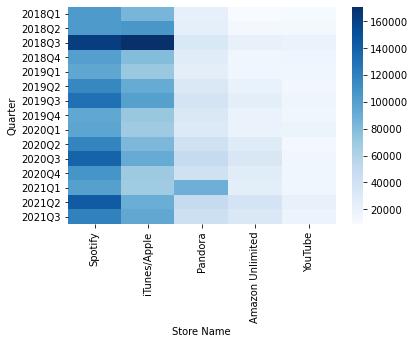

In [166]:
import seaborn as sns
%matplotlib inline
sns.heatmap(Quarter_5, cmap="Blues")

In [ ]:
Monthly = df.pivot_table(index = ['Statement Month', 'Store Name'], values = ['Net Revenue USD'], aggfunc = 'sum')
Monthly = Monthly.reset_index()
Monthly = Monthly.pivot(index = 'Statement Month', columns = 'Store Name', values = 'Net Revenue USD')
top_5_store = ['Spotify', 'iTunes/Apple', 'Pandora', 'Amazon Unlimited', 'YouTube']
Monthly[top_5_store]



### Spitify revenue over time

In [170]:
Spotify = df[df['Store Name'] == 'Spotify']

In [171]:
Spotify = Spotify.pivot_table(index = ['Statement Month'], values = ['Gross Revenue USD'], aggfunc = 'sum')
Spotify 

,Gross Revenue USD
Statement Month,
2018-01-01,55358.72
2018-02-01,29388.34
2018-03-01,30992.18
2018-04-01,36317.72
2018-05-01,37275.27
2018-06-01,42160.12
2018-07-01,69514.33
2018-08-01,60520.59
2018-09-01,50307.38


In [172]:
Spotify.describe()

,Gross Revenue USD
count,44.000000
mean,43856.684545
std,10021.431148
min,29388.340000
25%,36275.492500
50%,41476.100000
75%,49540.860000
max,69612.210000


Text(0.5, 1.0, 'Gross Revenue from Spotify')

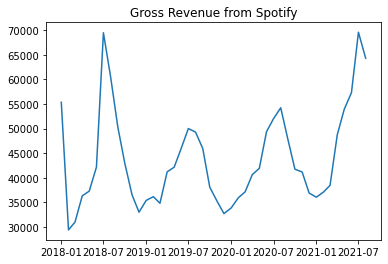

In [173]:
plt.plot(Spotify)
plt.title("Gross Revenue from Spotify")

We can see the seasonal trend from the plot above. In July each year, there is peaks in revenues. 

In [86]:
### Testing for stationarity

from statsmodels.tsa.stattools import adfuller

In [87]:
test_result=adfuller(Spotify['Gross Revenue USD'])

In [88]:
# H0: It is non stationary
# H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [89]:
adfuller_test(Spotify['Gross Revenue USD'])

ADF Test Statistic : -3.7875035683235336
p-value : 0.00303778901603057
#Lags Used : 4
Number of Observations Used : 39
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Auto Regressive Model

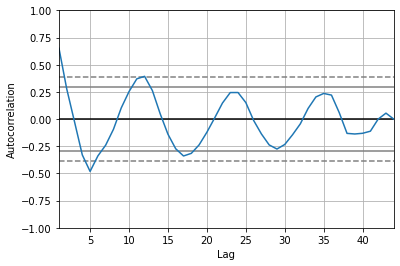

In [91]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Spotify['Gross Revenue USD'])
plt.show()

In [92]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

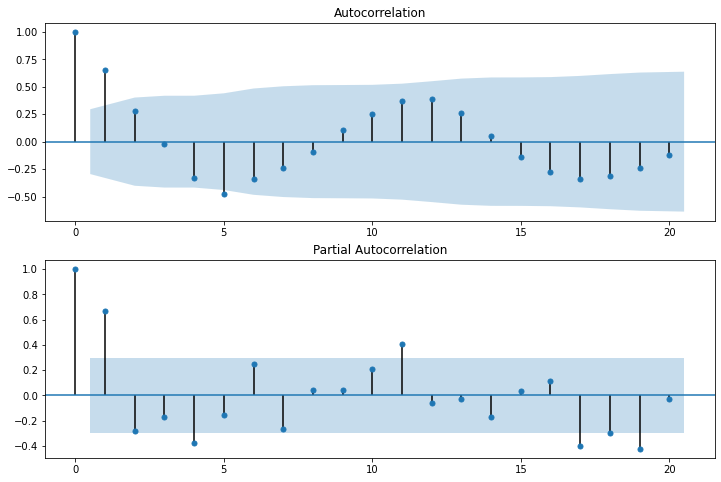

In [174]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Spotify['Gross Revenue USD'],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Spotify['Gross Revenue USD'],lags=20,ax=ax2)

In [96]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [97]:
model=ARIMA(Spotify['Gross Revenue USD'],order=(1,0,1))
model_fit=model.fit()

/Users/chenzhiqi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [98]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Gross Revenue USD   No. Observations:                   44
Model:                     ARMA(1, 1)   Log Likelihood                -450.784
Method:                       css-mle   S.D. of innovations           6735.581
Date:                Sun, 05 Dec 2021   AIC                            909.567
Time:                        18:24:47   BIC                            916.704
Sample:                    01-01-2018   HQIC                           912.214
                         - 08-01-2021                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.505e+04   3115.928     14.459      0.000    3.89e+04    5.12e+04
ar.L1.Gross Revenue USD     0.5435      0.170      3.205      0.001       0.211       0.876
ma.L1.Gross Revenue USD     0.4257      0.178      2.385      0.017       0.076       0.776
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8398           +0.0000j            1.8398            0.0000
MA.1           -2.3490           +0.0000j            2.3490            0.5000
-----------------------------------------------------------------------------
"""

In [102]:
Spotify['forecast']=model_fit.predict(start=35,end=44,dynamic=True)
#df[['Gross Revenue USD','forecast']].plot(figsize=(12,8))
Spotify

,Gross Revenue USD,forecast
Statement Month,,
2018-01-01,55358.72,NaN
2018-02-01,29388.34,NaN
2018-03-01,30992.18,NaN
2018-04-01,36317.72,NaN
2018-05-01,37275.27,NaN
2018-06-01,42160.12,NaN
2018-07-01,69514.33,NaN
2018-08-01,60520.59,NaN
2018-09-01,50307.38,NaN


In [103]:
import statsmodels.api as sm

In [191]:
model=sm.tsa.statespace.SARIMAX(Spotify['Gross Revenue USD'],order=(1, 0, 2),seasonal_order=(1, 0, 2, 12))
results=model.fit()
results.summary()

/Users/chenzhiqi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/chenzhiqi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/chenzhiqi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Gross Revenue USD   No. Observations:                   44
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood                -453.891
Date:                            Mon, 06 Dec 2021   AIC                            921.783
Time:                                    12:20:41   BIC                            934.272
Sample:                                01-01-2018   HQIC                           926.414
                                     - 08-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9977      0.157      6.360      0.000       0.690       1.305
ma.L1         -0.3863      0.137     -2.822      0.005      -0.655      -0.118
ma.L2         -0.5330      0.140     -3.820      0.000      -0.807      -0.259
ar.S.L12       0.9996      0.091     10.977      0.000       0.821       1.178
ma.S.L12       0.0164      2.986      0.005      0.996      -5.836       5.869
ma.S.L24      -0.9836      0.388     -2.535      0.011      -1.744      -0.223
sigma2       2.08e+07   1.45e-08   1.43e+15      0.000    2.08e+07    2.08e+07
===================================================================================
Ljung-Box (Q):                       71.60   Jarque-Bera (JB):                 2.07
Prob(Q):                              0.00   Prob(JB):                         0.35
Heteroskedasticity (H):               0.50   Skew:                            -0.03
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.87e+32. Standard errors may be unstable.
"""

In [189]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Gross Revenue USD   No. Observations:                   44
Model:                     ARMA(1, 1)   Log Likelihood                -450.784
Method:                       css-mle   S.D. of innovations           6735.581
Date:                Mon, 06 Dec 2021   AIC                            909.567
Time:                        12:19:39   BIC                            916.704
Sample:                    01-01-2018   HQIC                           912.214
                         - 08-01-2021                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4.505e+04   3115.928     14.459      0.000    3.89e+04    5.12e+04
ar.L1.Gross Revenue USD     0.5435      0.170      3.205      0.001       0.211       0.876
ma.L1.Gross Revenue USD     0.4257      0.178      2.385      0.017       0.076       0.776
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8398           +0.0000j            1.8398            0.0000
MA.1           -2.3490           +0.0000j            2.3490            0.5000
-----------------------------------------------------------------------------
"""

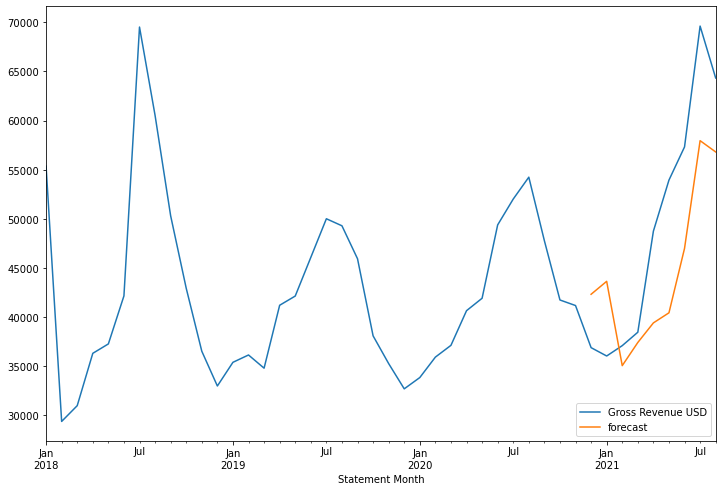

In [190]:
Spotify['forecast']=results.predict(start=35,end=44,dynamic=True)
Spotify[['Gross Revenue USD','forecast']].plot(figsize=(12,8))


In [124]:
from pandas.tseries.offsets import DateOffset
future_dates=[Spotify.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [125]:
future_datest_Spotify=pd.DataFrame(index=future_dates[1:],columns=Spotify.columns)

In [126]:
future_Spotify=pd.concat([Spotify,future_datest_Spotify])

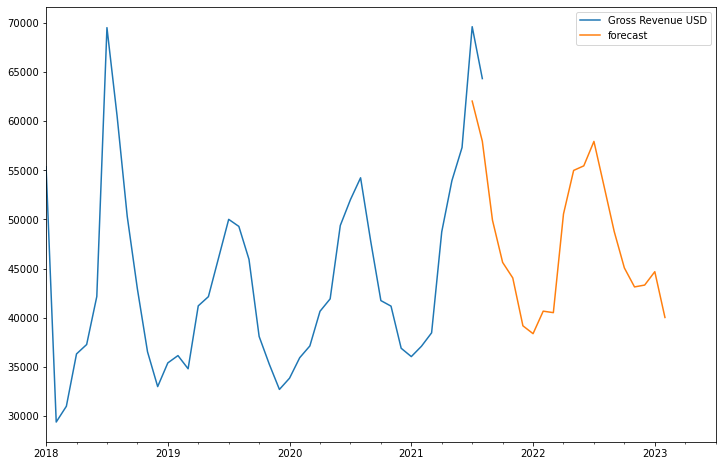

In [129]:
future_Spotify['forecast'] = results.predict(start = 42, end = 61, dynamic= True)  
future_Spotify[['Gross Revenue USD', 'forecast']].plot(figsize=(12, 8)) 

### iTunes/Apple Music revenue over time

In [73]:
iTunes = df[df['Store Name'] == 'iTunes/Apple']

In [74]:
iTunes = iTunes.pivot_table(index = ['Statement Month'], values = ['Gross Revenue USD'], aggfunc = 'sum')
iTunes

,Gross Revenue USD
Statement Month,
2018-01-01,41315.98
2018-02-01,23790.57
2018-03-01,28459.48
2018-04-01,43178.56
2018-05-01,38870.73
2018-06-01,36166.77
2018-07-01,85965.20
2018-08-01,65814.11
2018-09-01,37950.95


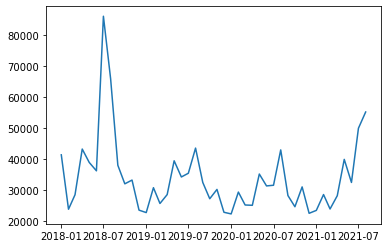

In [75]:
plt.plot(iTunes)

### Total revenue over time

In [76]:
Total = df.pivot_table(index = ['Statement Month'], values = ['Gross Revenue USD'], aggfunc = 'sum')
Total

,Gross Revenue USD
Statement Month,
2018-01-01,134623.50
2018-02-01,82327.74
2018-03-01,81746.36
2018-04-01,105829.42
2018-05-01,104907.35
2018-06-01,111803.52
2018-07-01,207097.60
2018-08-01,168411.98
2018-09-01,130041.99


In [192]:
Total.to_csv('Total.csv')

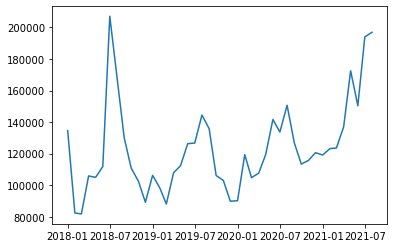

In [77]:
plt.plot(Total)

In [130]:
test_result_total=adfuller(Total['Gross Revenue USD'])

In [131]:
adfuller_test(Total['Gross Revenue USD'])

ADF Test Statistic : -2.4023109328187817
p-value : 0.1410852270420797
#Lags Used : 0
Number of Observations Used : 43
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [134]:
Total['Seasonal First Difference']=Total['Gross Revenue USD']-Total['Gross Revenue USD'].shift(1)

In [135]:
## Again test dickey fuller test
adfuller_test(Total['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.452995586138008
p-value : 5.6064135410035886e-11
#Lags Used : 0
Number of Observations Used : 42
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


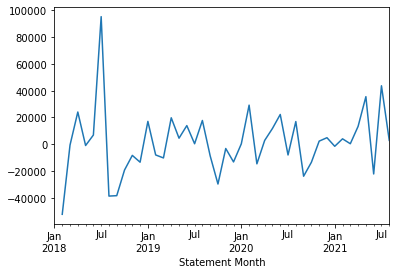

In [136]:
Total['Seasonal First Difference'].plot()

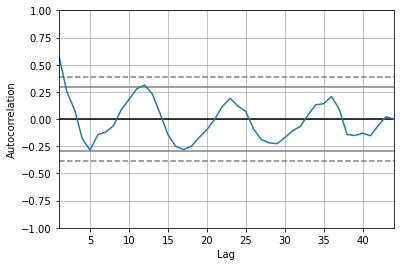

In [137]:
autocorrelation_plot(Total['Gross Revenue USD'])
plt.show()

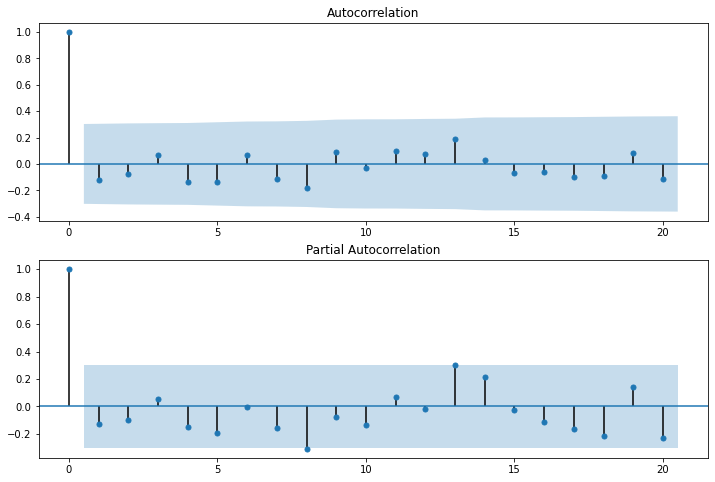

In [177]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Total['Seasonal First Difference'].iloc[2:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Total['Seasonal First Difference'].iloc[2:],lags=20,ax=ax2)

In [140]:
model_total=sm.tsa.statespace.SARIMAX(Total['Gross Revenue USD'],order=(0, 1, 0),seasonal_order=(0,1,0,12))
results=model_total.fit()

/Users/chenzhiqi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/chenzhiqi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


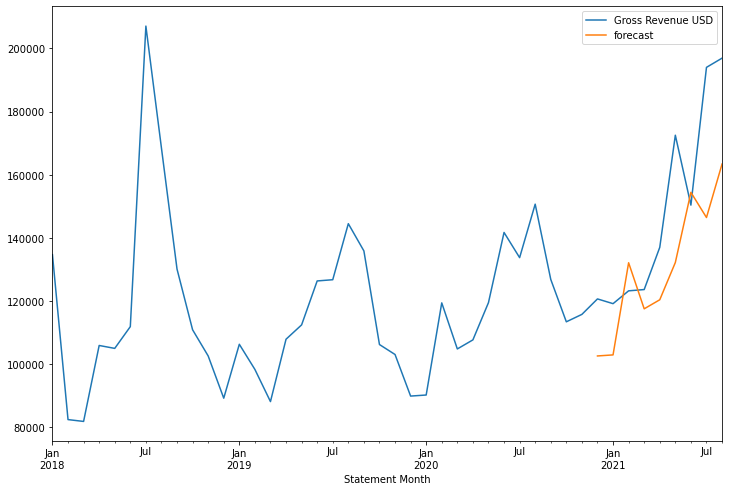

In [141]:
Total['forecast']=results.predict(start=35,end=44,dynamic=True)
Total[['Gross Revenue USD','forecast']].plot(figsize=(12,8))

In [142]:
future_dates=[Total.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [143]:
future_datest_Total=pd.DataFrame(index=future_dates[1:],columns=Total.columns)

In [144]:
future_Total=pd.concat([Total,future_datest_Total])

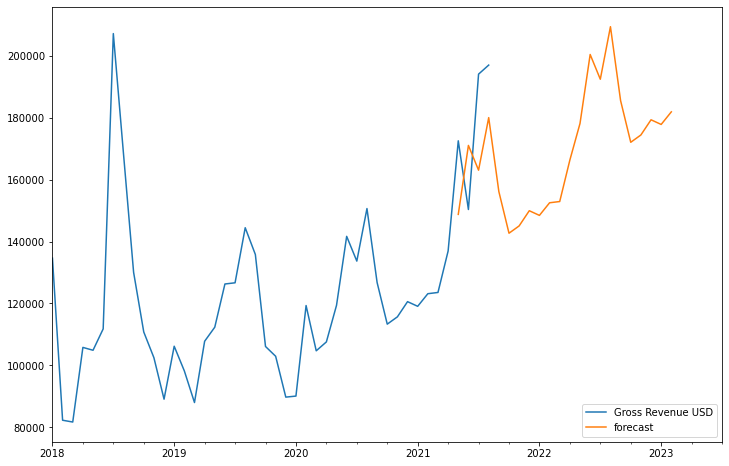

In [146]:
future_Total['forecast'] = results.predict(start = 40, end = 61, dynamic= True)  
future_Total[['Gross Revenue USD', 'forecast']].plot(figsize=(12, 8)) 